## Statistics Practical Implementation 📉

### Measure Of Central Tendency

1. Mean
2. Median
3. Mode

In [1]:
ages=[23,24,32,45,12,43,67,45,32,56,32,120]

### Import

In [2]:
import numpy as np
import statistics

### mean
Used when outlier is no there , other wise it is affected by outliers

In [3]:
print(np.mean(ages))

44.25


In [4]:
print(statistics.mean(ages))

44.25


### Median
To deal with outliers

In [5]:
print(np.median(ages))

37.5


In [6]:
print(statistics.median(ages))

37.5


### Mode
Used when to identify a category to fill the data in as it uses frequency.

In [7]:
statistics.mode(ages)

32

## Boxplot

<Axes: >

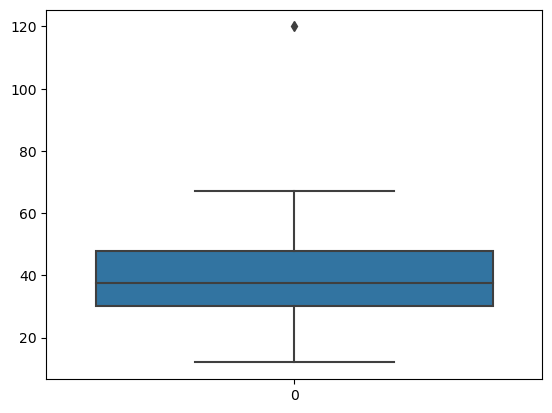

In [8]:
import seaborn as sns
sns.boxplot(ages)

## Number Summary

In [9]:
import numpy as np

In [10]:
q1,q3=np.percentile(ages,[25,75])

In [11]:
print(q1,q3)

30.0 47.75


## Let's check outlier[Lower Fence- Higher fence]

In [12]:
IQR=q3-q1
lower_fence=q1-1.5*(IQR)
higher_fence=q3+1.5*(IQR)
print(lower_fence,higher_fence)

3.375 74.375


N.B : so in this range (3.375 , 74.375) all values are good to consider , value exceed the range means outlier eg. 120 

## Measure Of Dispersion

1. Variance
2. Standard Deviation

sample variance

In [13]:
statistics.variance(ages)

795.2954545454545

population variance

In [14]:
statistics.pvariance(ages)

729.0208333333334

In [15]:
np.var(ages,axis=0)

729.0208333333334

 Both gives different variance as `statistics.variance` calculates `sample variance` and `np.var` calculates `population variance`

#### Manually calculate variance

In [16]:
def variance(data):
    n=len(ages)
  ## mean of the data
    mean=sum(data)/n
  ## variance
    deviation=[(x - mean) ** 2 for x in data]
    variance=sum(deviation)/(n-1)
    return variance

In [17]:
variance(ages)

795.2954545454545

In [18]:
def variance(data,dof=0):
    n=len(ages)
    ## mean of the data
    mean=sum(data)/n
    ## variance
    deviation=[(x - mean) ** 2 for x in data]
    variance=sum(deviation)/(n-dof)
    return variance

In [19]:
variance(ages,dof=1)

795.2954545454545

## Standard Deviation

In [20]:
import math
math.sqrt(statistics.pvariance(ages))

27.000385799712813

## Histograms And PDF

<Axes: ylabel='Count'>

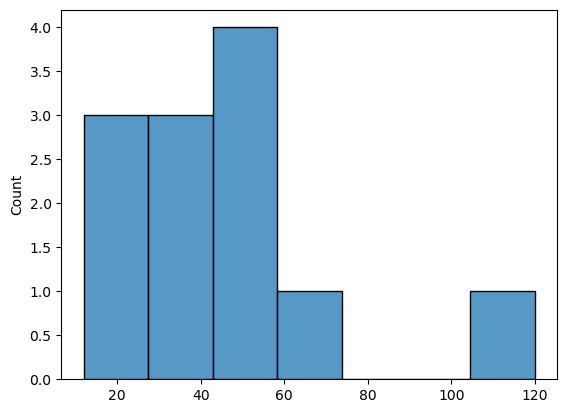

In [21]:
import seaborn as sns
sns.histplot(ages)

<Axes: ylabel='Count'>

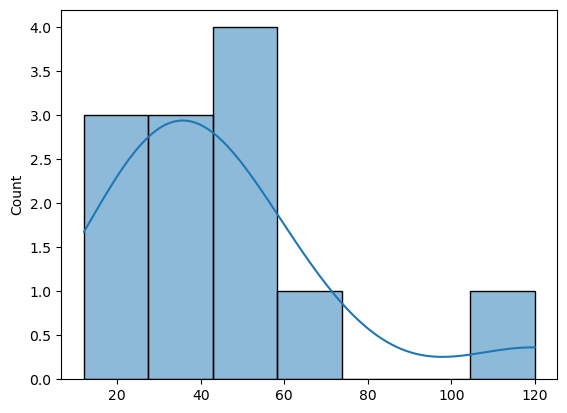

In [22]:
### Kernel density estimater
### PDF

sns.histplot(ages,kde=True)

### On iris dataset

In [23]:
df=sns.load_dataset('iris')

In [24]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

<Axes: xlabel='sepal_length', ylabel='Count'>

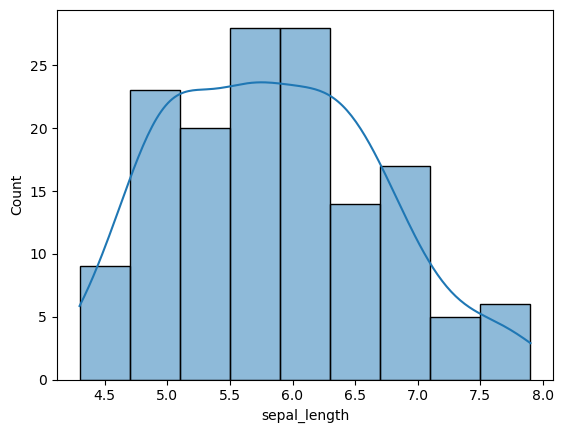

In [25]:
sns.histplot(df['sepal_length'],kde=True)

#### Gaussian / Normal distribution

<Axes: xlabel='sepal_width', ylabel='Count'>

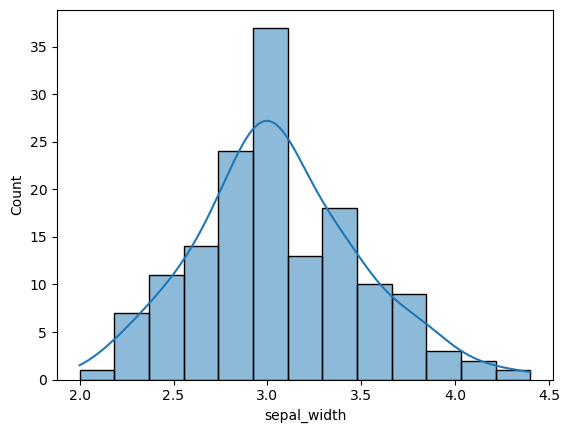

In [26]:
sns.histplot(df['sepal_width'],kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

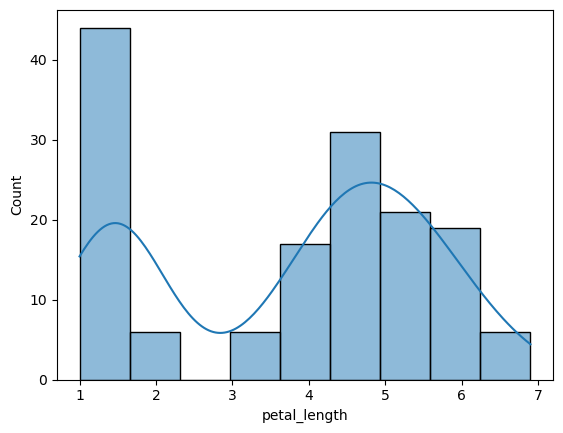

In [27]:
sns.histplot(df['petal_length'],kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

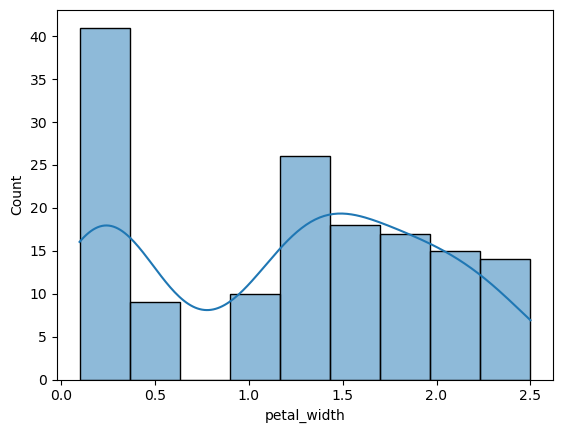

In [28]:
sns.histplot(df['petal_width'],kde=True)

#### create a normal distributed data


In [29]:
s=np.random.normal(0.5,0.2,1000)

In [30]:
s

array([ 0.23827335,  0.66056163,  0.74232696,  0.67319033,  0.34861719,
        0.69317885,  0.4640027 ,  0.61998003,  0.39971382, -0.02008048,
        0.73698106,  0.7069826 ,  0.65277738,  0.57237388,  0.4941129 ,
        0.20523609,  0.6693801 ,  0.50723335,  0.03873224,  0.55544328,
        0.10115847,  0.21585706,  0.71136682,  0.31560936,  0.38112931,
        0.4660875 ,  0.8262286 ,  0.45849306,  0.11901987,  0.14864948,
        0.4890154 ,  0.13882865,  0.87670093,  0.69774077,  0.45753076,
        0.59410748,  0.71284481,  0.20370898,  0.70687184,  0.70422663,
        0.57575278,  0.10083459,  0.67955481,  0.40232361,  0.83712288,
        0.44339371,  0.52462406,  0.44518916,  0.63195295,  0.43510361,
        0.84923669,  0.73138692,  0.80533195,  0.40142403,  0.29800992,
        0.53245766,  0.50105298,  0.9234668 ,  0.38965621,  0.3913594 ,
       -0.12851213,  0.72180242,  0.55340292,  0.81479094,  0.22411046,
        0.59966365,  0.64849896,  0.61766732,  0.23334581,  0.49

<Axes: ylabel='Count'>

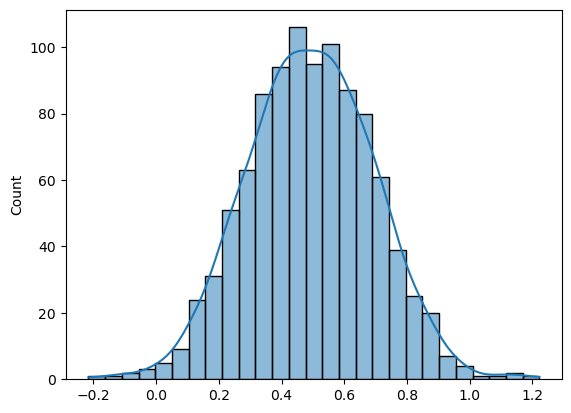

In [31]:
sns.histplot(s,kde=True)

## Other Distribuiton
## Log Normal Distribution,Power Law Distribution

In [32]:
mu, sigma = 3., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)

<Axes: ylabel='Count'>

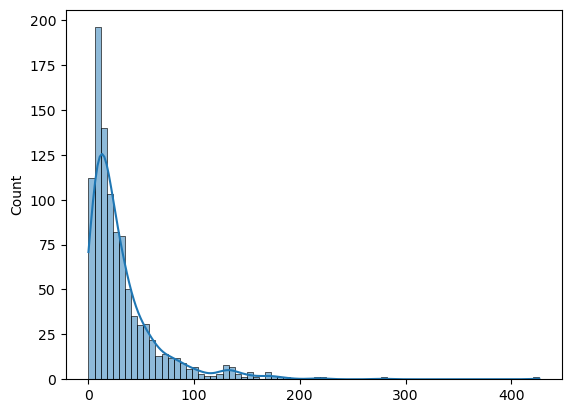

In [33]:
sns.histplot(s,kde=True)

When applied log we get Normal distribution

<Axes: ylabel='Count'>

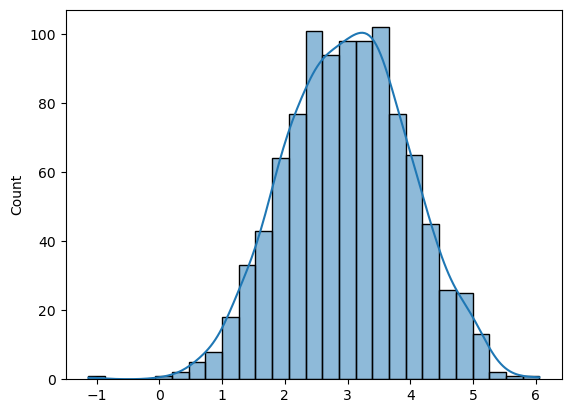

In [34]:
sns.histplot(np.log(s),kde=True)

## Check whether Disstribution is Normal Distribution

#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot

In [35]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()

### create a normal distributed data

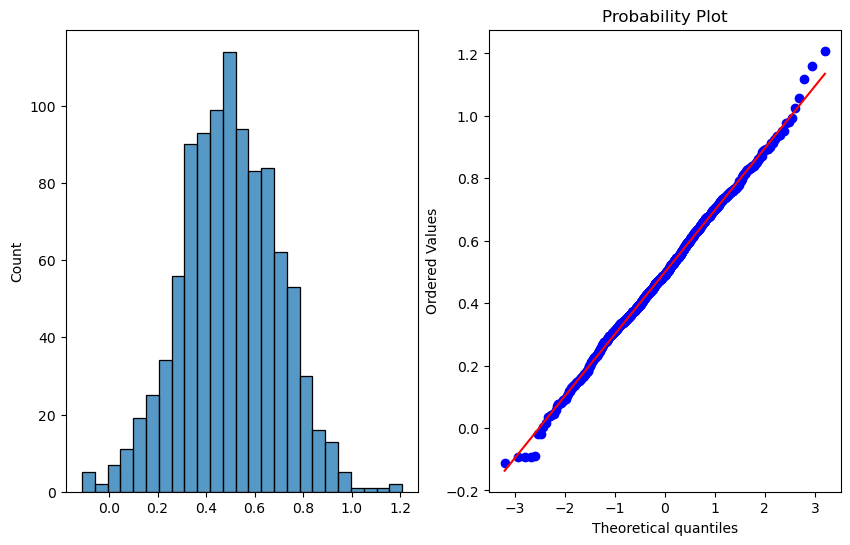

In [36]:
s=np.random.normal(0.5,0.2,1000)
plot_data(s)

### Check with `sepal_width`

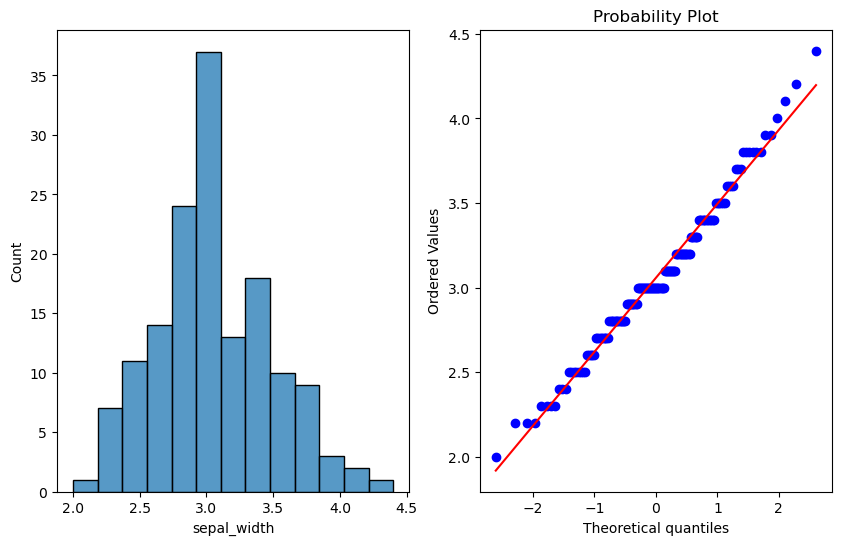

In [37]:
plot_data(df['sepal_width'])

### Check Log normal distribution

In [38]:
mu, sigma = 3., 1. # mean and standard deviation
sample = np.random.lognormal(mu, sigma, 100)

In [39]:
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()

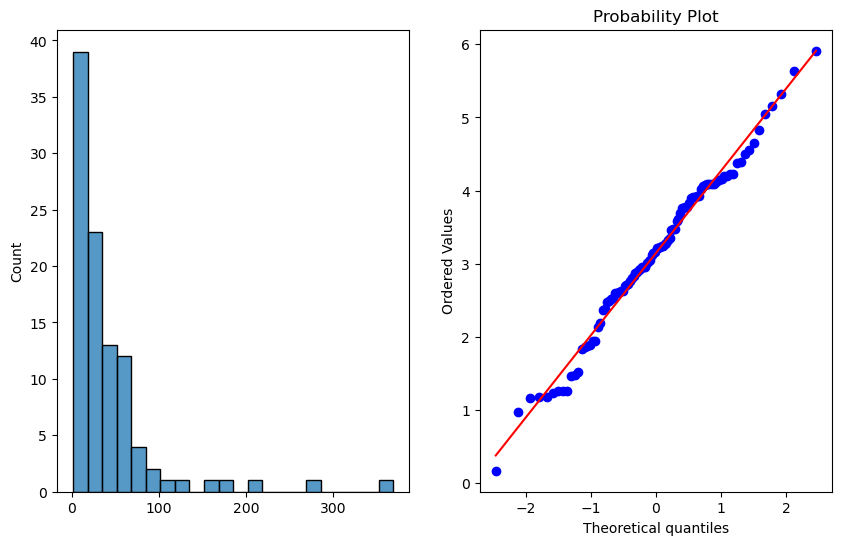

In [40]:
plot_data_log(sample)

## Pearson and Sperman Rank Correlation

In [41]:
df=sns.load_dataset('tips')

In [42]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [43]:
import pandas as pd

In [44]:
df_numeric = pd.get_dummies(df)

In [45]:
correlation_matrix = df_numeric.corr()
correlation_matrix

total_bill       tip      size  sex_Male  sex_Female  smoker_Yes  \
total_bill     1.000000  0.675734  0.598315  0.144877   -0.144877    0.085721   
tip            0.675734  1.000000  0.489299  0.088862   -0.088862    0.005929   
size           0.598315  0.489299  1.000000  0.086195   -0.086195   -0.133178   
sex_Male       0.144877  0.088862  0.086195  1.000000   -1.000000    0.002816   
sex_Female    -0.144877 -0.088862 -0.086195 -1.000000    1.000000   -0.002816   
smoker_Yes     0.085721  0.005929 -0.133178  0.002816   -0.002816    1.000000   
smoker_No     -0.085721 -0.005929  0.133178 -0.002816    0.002816   -1.000000   
day_Thur      -0.138174 -0.095879 -0.072598 -0.194445    0.194445   -0.128534   
day_Fri       -0.086168 -0.055463 -0.142184 -0.071060    0.071060    0.244316   
day_Sat        0.054919 -0.002790 -0.041121  0.053957   -0.053957    0.155744   
day_Sun        0.122953  0.125114  0.193054  0.168106   -0.168106   -0.181624   
time_Lunch    -0.183118 -0.121629 -0.103411 -0.205231    0.205231   -0.054921   
time_Dinner    0.183118  0.121629  0.103411  0.205231   -0.205231    0.054921   

             smoker_No  day_Thur   day_Fri   day_Sat   day_Sun  time_Lunch  \
total_bill   -0.085721 -0.138174 -0.086168  0.054919  0.122953   -0.183118   
tip          -0.005929 -0.095879 -0.055463 -0.002790  0.125114   -0.121629   
size          0.133178 -0.072598 -0.142184 -0.041121  0.193054   -0.103411   
sex_Male     -0.002816 -0.194445 -0.071060  0.053957  0.168106   -0.205231   
sex_Female    0.002816  0.194445  0.071060 -0.053957 -0.168106    0.205231   
smoker_Yes   -1.000000 -0.128534  0.244316  0.155744 -0.181624   -0.054921   
smoker_No     1.000000  0.128534 -0.244316 -0.155744  0.181624    0.054921   
day_Thur      0.128534  1.000000 -0.169608 -0.434480 -0.392566    0.917996   
day_Fri      -0.244316 -0.169608  1.000000 -0.216319 -0.195451    0.058159   
day_Sat      -0.155744 -0.434480 -0.216319  1.000000 -0.500682   -0.462709   
day_Sun       0.181624 -0.392566 -0.195451 -0.500682  1.000000   -0.418071   
time_Lunch    0.054921  0.917996  0.058159 -0.462709 -0.418071    1.000000   
time_Dinner  -0.054921 -0.917996 -0.058159  0.462709  0.418071   -1.000000   

             time_Dinner  
total_bill      0.183118  
tip             0.121629  
size            0.103411  
sex_Male        0.205231  
sex_Female     -0.205231  
smoker_Yes      0.054921  
smoker_No      -0.054921  
day_Thur       -0.917996  
day_Fri        -0.058159  
day_Sat         0.462709  
day_Sun         0.418071  
time_Lunch     -1.000000  
time_Dinner     1.000000

C:\Users\udaya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


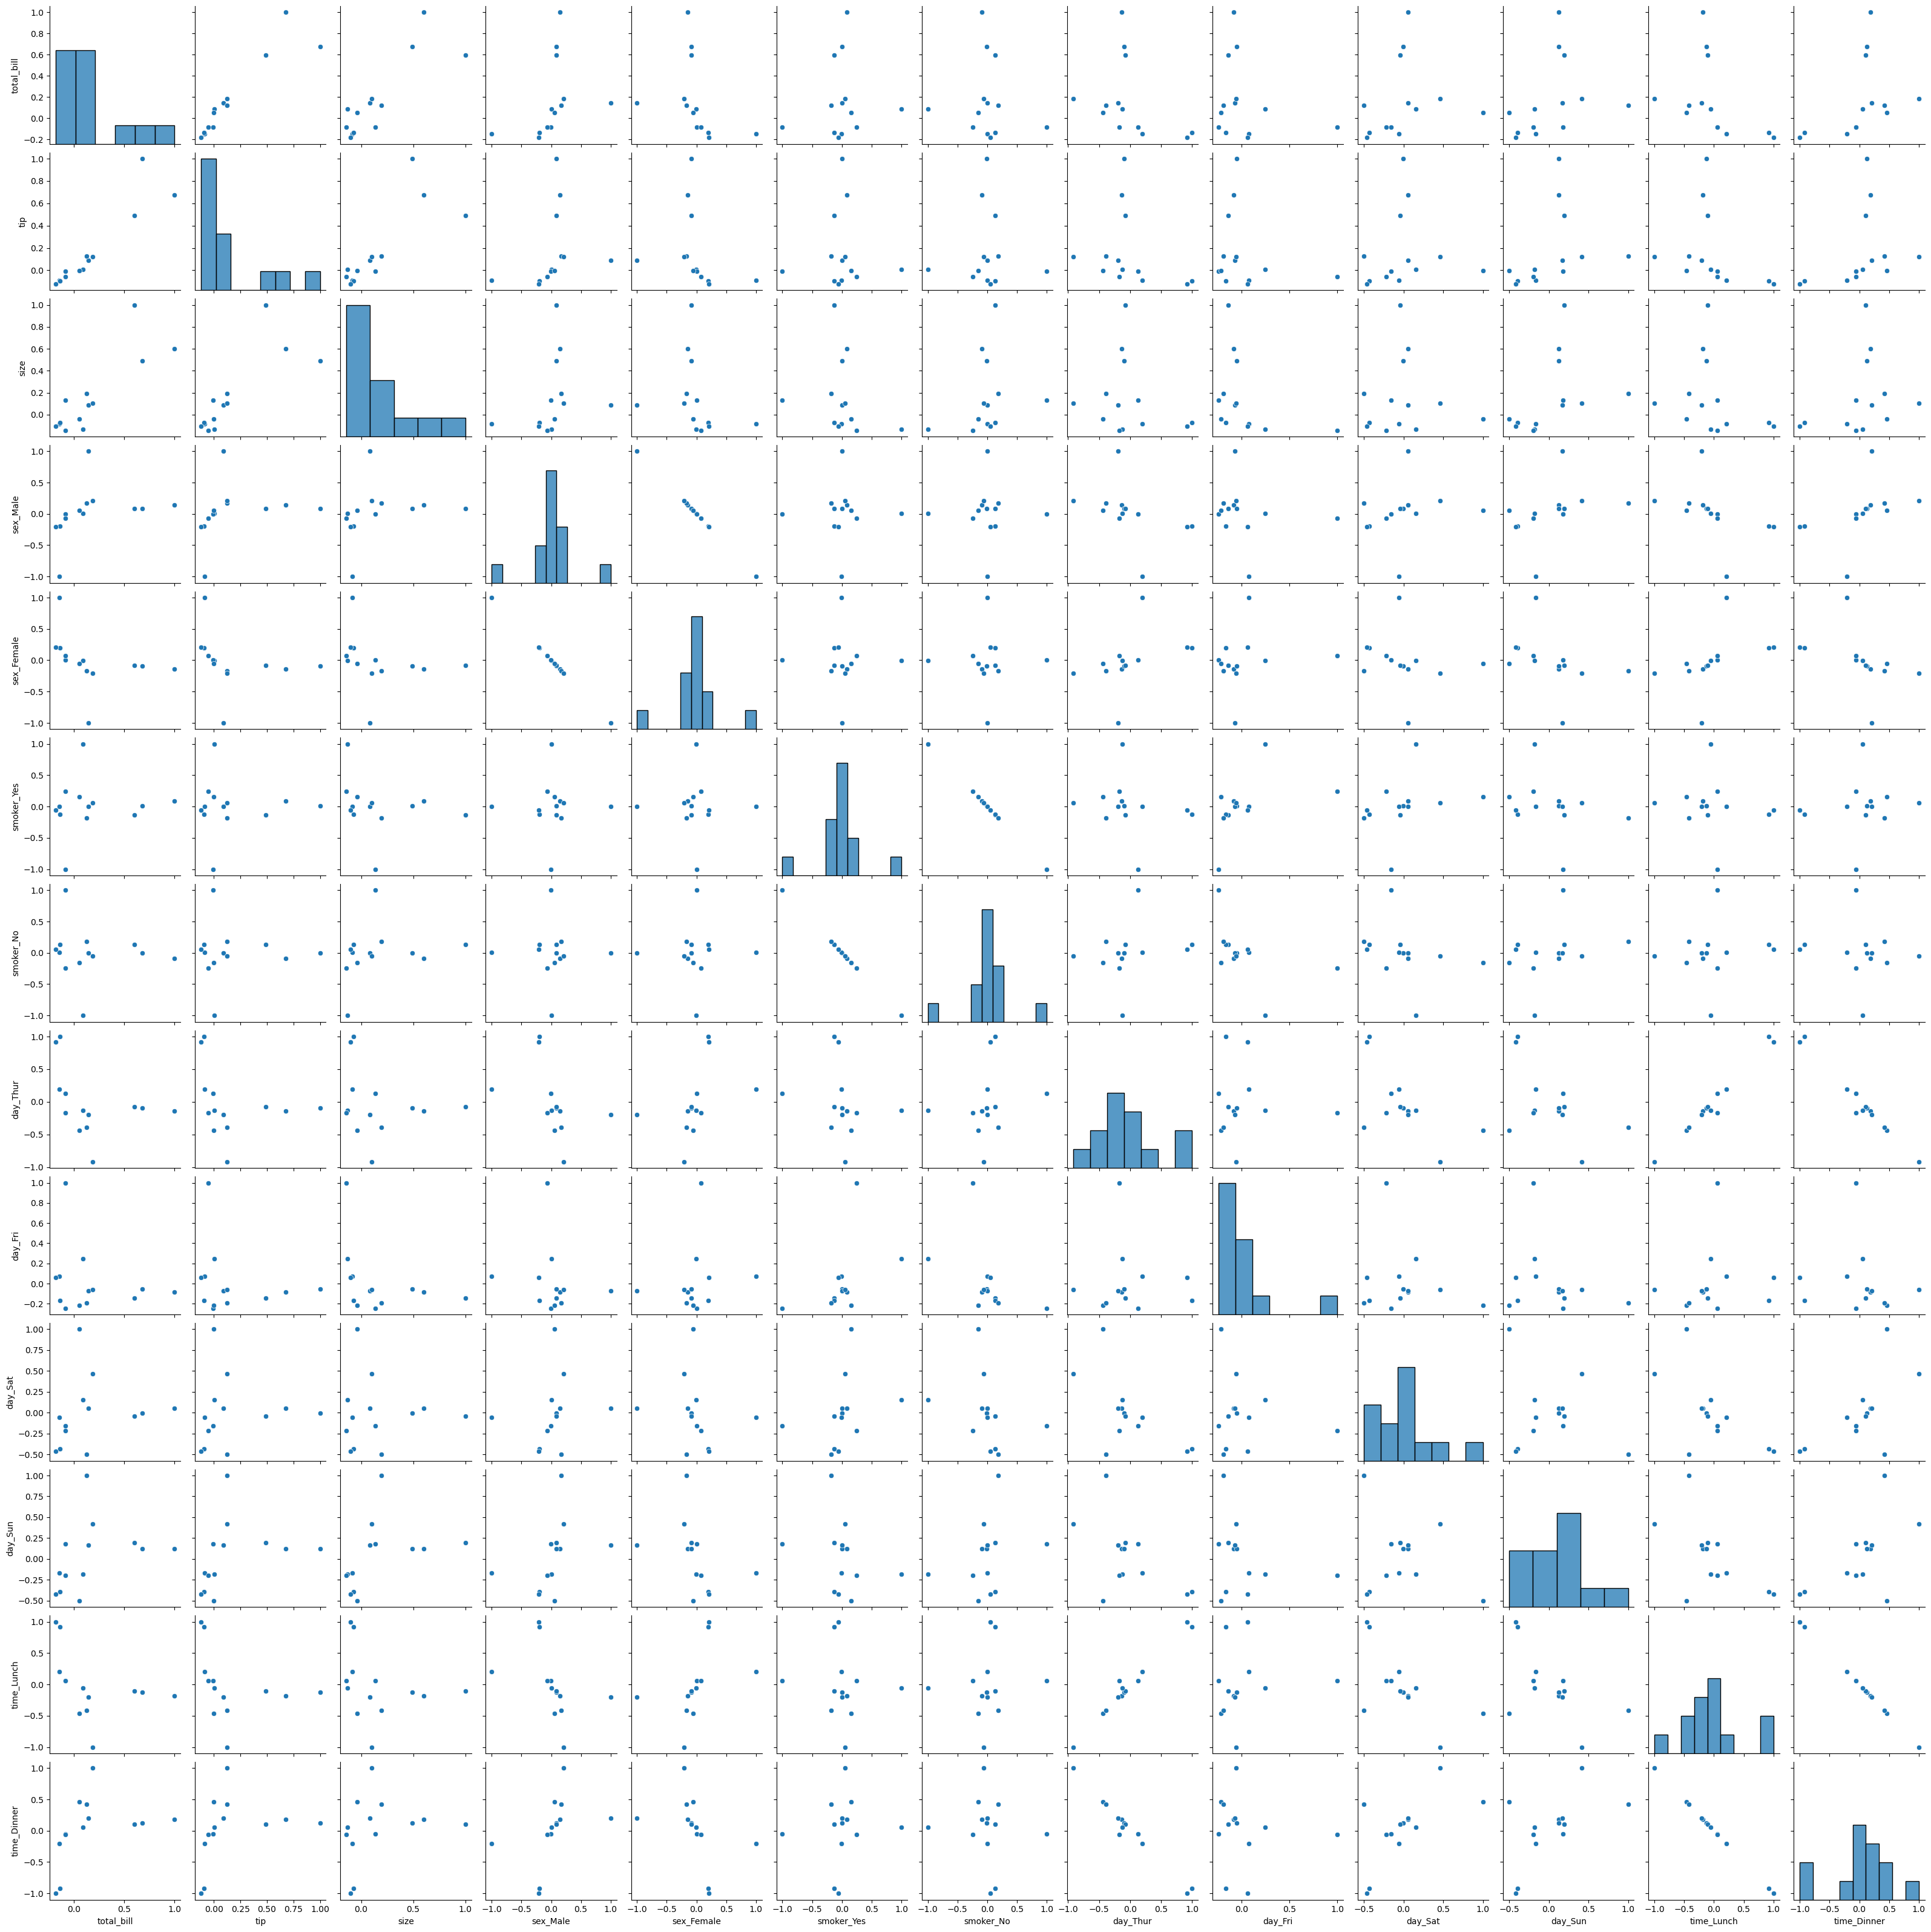

In [46]:
sns.pairplot(correlation_matrix)
plt.show()

C:\Users\udaya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


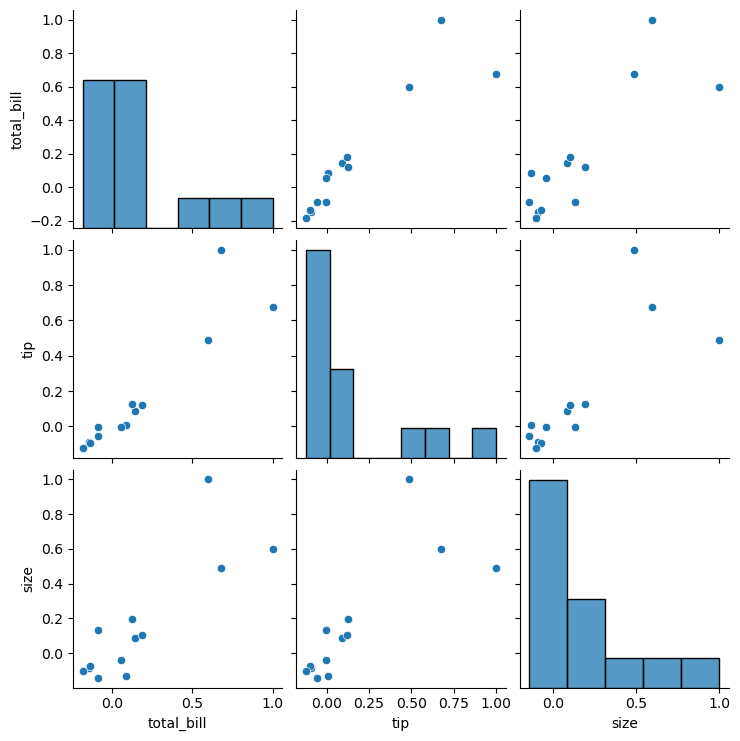

In [47]:
sns.pairplot(correlation_matrix.iloc[:3, :].T)  # Transpose the matrix to have variables as rows
plt.show()

## power-law distribution

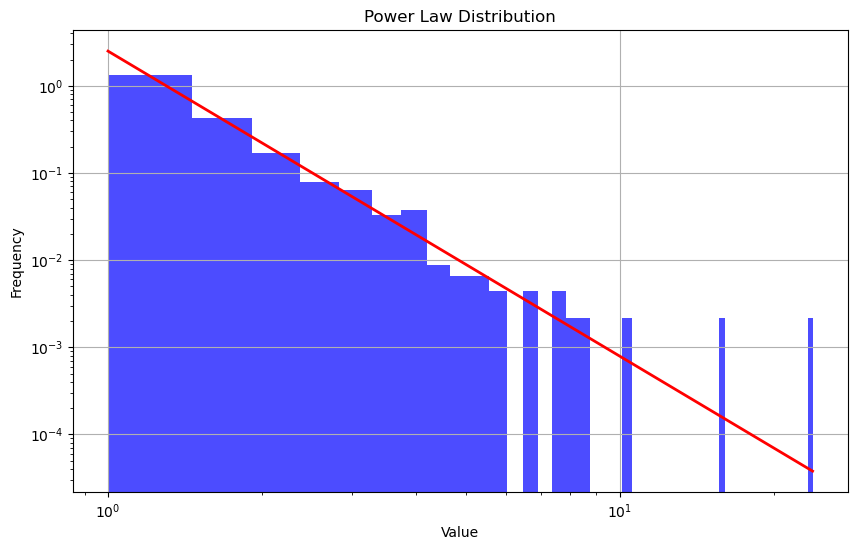

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 2.5  # Power law exponent
xmin = 1     # Minimum value for the distribution
num_points = 1000  # Number of data points

# Generate data from a power-law distribution
data = (np.random.pareto(alpha, num_points) + 1) * xmin

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, density=True, alpha=0.7, color='b')

# Plot the power-law fit
x = np.linspace(min(data), max(data), 1000)
y = alpha * xmin**alpha / x**(alpha + 1)
plt.plot(x, y, 'r-', linewidth=2)

plt.title('Power Law Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

## Pareto distribution

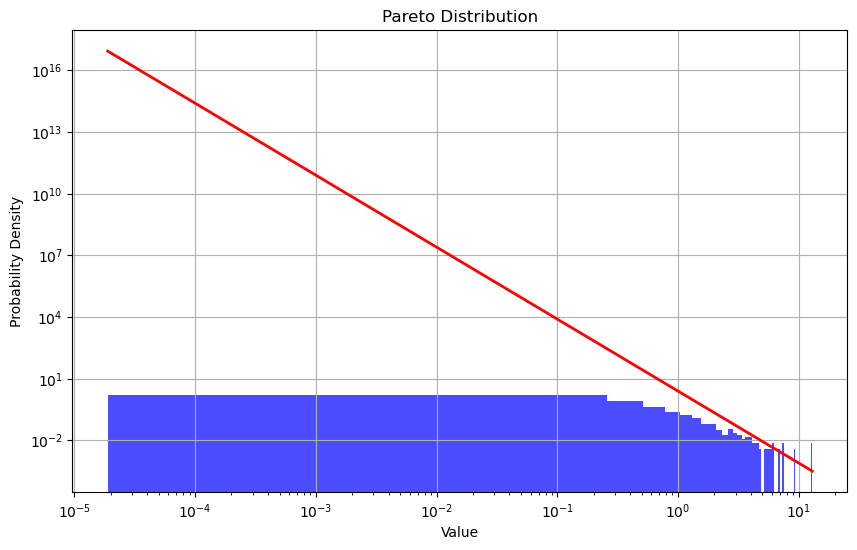

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 2.5  # Shape parameter (also known as the tail index)
xmin = 1     # Minimum value for the distribution
num_points = 1000  # Number of data points

# Generate data from a Pareto distribution
data = xmin * np.random.pareto(alpha, num_points)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, density=True, alpha=0.7, color='b')

# Plot the theoretical Pareto probability density function
x = np.linspace(min(data), max(data), 1000)
pdf = (alpha * xmin**alpha) / (x**(alpha + 1))
plt.plot(x, pdf, 'r-', linewidth=2)

plt.title('Pareto Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

## PDFs for the Pareto, Exponential, Normal (Gaussian), and Uniform distributions

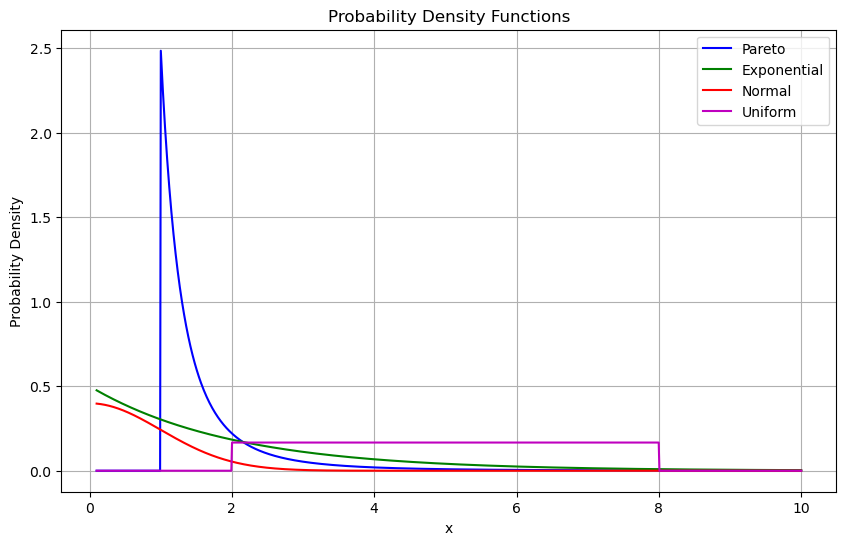

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto, expon, norm, uniform

# Define range for x values
x = np.linspace(0.1, 10, 1000)

# Parameters for the distributions
alpha = 2.5  # Shape parameter for Pareto distribution
lambda_exp = 0.5  # Rate parameter for Exponential distribution
mu = 0           # Mean for Normal distribution
sigma = 1        # Standard deviation for Normal distribution
a = 2            # Lower bound for Uniform distribution
b = 8            # Upper bound for Uniform distribution

# Calculate PDFs for each distribution
pdf_pareto = pareto.pdf(x, alpha, scale=1)
pdf_exp = expon.pdf(x, scale=1/lambda_exp)
pdf_norm = norm.pdf(x, mu, sigma)
pdf_uniform = uniform.pdf(x, a, b - a)

# Plot the PDFs
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_pareto, label='Pareto', color='b')
plt.plot(x, pdf_exp, label='Exponential', color='g')
plt.plot(x, pdf_norm, label='Normal', color='r')
plt.plot(x, pdf_uniform, label='Uniform', color='m')

plt.title('Probability Density Functions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

## PDF (Probability Density Function) V/S CDF (Cumulative Distribution Function)

#### PDF (Probability Density Function):

* The PDF represents the probability distribution of a continuous random variable.
* It gives the probability density at a specific value of the random variable.
* For continuous random variables, the probability of observing a single value is technically zero, but the PDF indicates the relative likelihood of observing values within an interval.
* The area under the PDF curve over an interval gives the probability of observing values in that interval.
#### CDF (Cumulative Distribution Function):

* The CDF represents the cumulative probability distribution of a random variable.
* It gives the probability that a random variable takes on a value less than or equal to a given value.
* Unlike the PDF, the CDF is defined for both continuous and discrete random variables.
* The CDF is a monotonically increasing function bounded between 0 and 1.
* The CDF is obtained by integrating the PDF from negative infinity up to a given point.

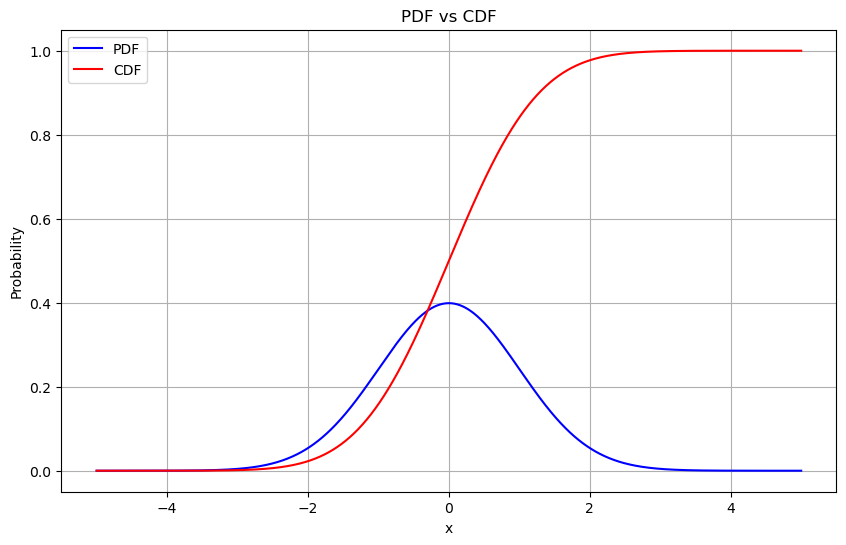

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate data points for x
x = np.linspace(-5, 5, 1000)

# Calculate PDF and CDF for standard normal distribution
pdf = norm.pdf(x)
cdf = norm.cdf(x)

# Plot PDF and CDF
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='PDF', color='b')
plt.plot(x, cdf, label='CDF', color='r')

plt.title('PDF vs CDF')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

## Probability Mass Function

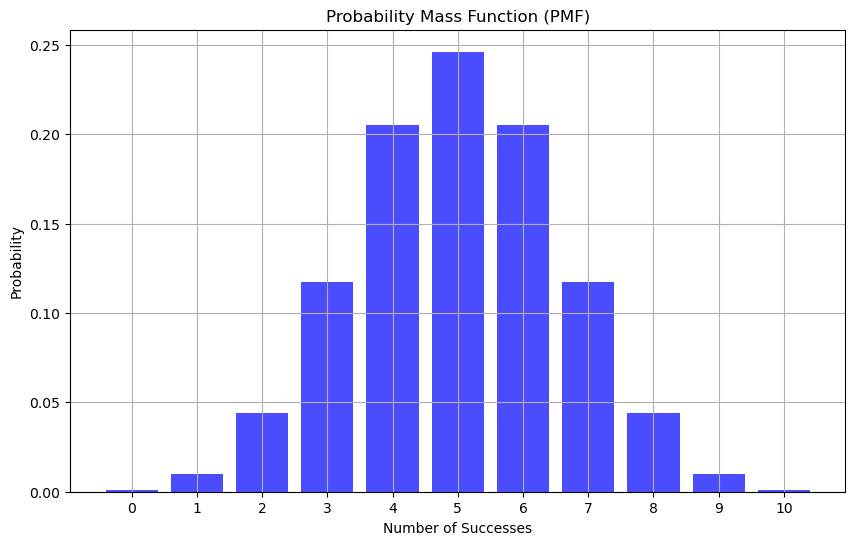

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters for the Binomial distribution
n = 10  # Number of trials
p = 0.5  # Probability of success

# Generate data points for x (number of successes)
x = np.arange(0, n+1)

# Calculate PMF for the Binomial distribution
pmf = binom.pmf(x, n, p)

# Plot PMF
plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='b', alpha=0.7)

plt.title('Probability Mass Function (PMF)')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.xticks(x)
plt.grid(True)
plt.show()

# Hypothesis testing!!

#### Hypothesis testing is a crucial aspect of statistical analysis, especially in machine learning applications. Let's discuss the hypothesis testing process for each of the statistical tests mentioned earlier.

## Z-test Hypothesis:

#### Null Hypothesis (H0): There is no significant difference between the means of the two populations.
#### Alternative Hypothesis (H1): There is a significant difference between the means of the two populations.
#### Decision Rule:

If the p-value is less than the chosen significance level (usually 0.05), reject the null hypothesis.

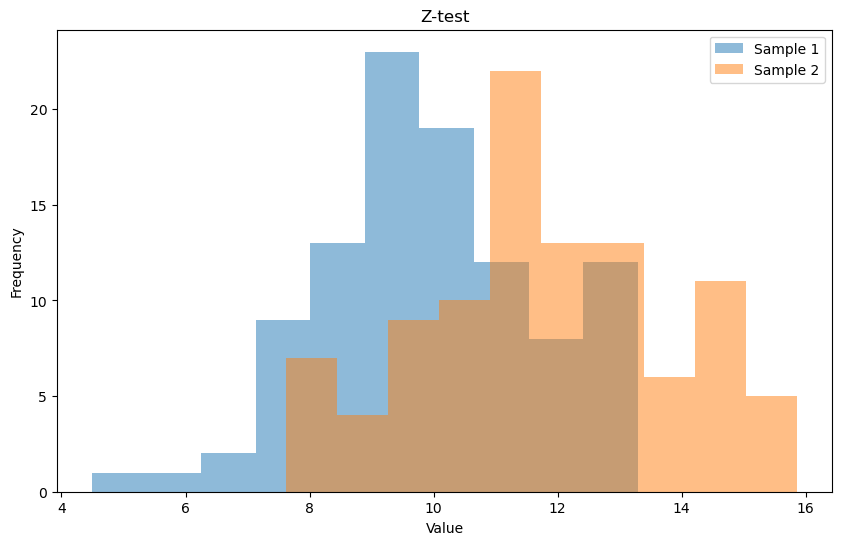

Z-statistic: 6.822690096802504
P-value: 8.93507490218326e-12
Reject null hypothesis


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Sample data
sample1 = np.random.normal(loc=10, scale=2, size=100)
sample2 = np.random.normal(loc=12, scale=2, size=100)

# Z-test
z_stat = abs(sample1.mean() - sample2.mean()) / np.sqrt((sample1.var() / len(sample1)) + (sample2.var() / len(sample2)))
p_value = 2 * (1 - norm.cdf(z_stat))

# Hypothesis
alpha = 0.05
if p_value < alpha:
    hypothesis = "Reject null hypothesis"
else:
    hypothesis = "Fail to reject null hypothesis"

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(sample1, alpha=0.5, label='Sample 1')
plt.hist(sample2, alpha=0.5, label='Sample 2')
plt.title("Z-test")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print("Z-statistic:", z_stat)
print("P-value:", p_value)
print(hypothesis)

## T-test Hypothesis

#### Null Hypothesis (H0): There is no significant difference between the means of the two groups.
#### Alternative Hypothesis (H1): There is a significant difference between the means of the two groups.
#### Decision Rule:

If the p-value is less than the chosen significance level (usually 0.05), reject the null hypothesis.

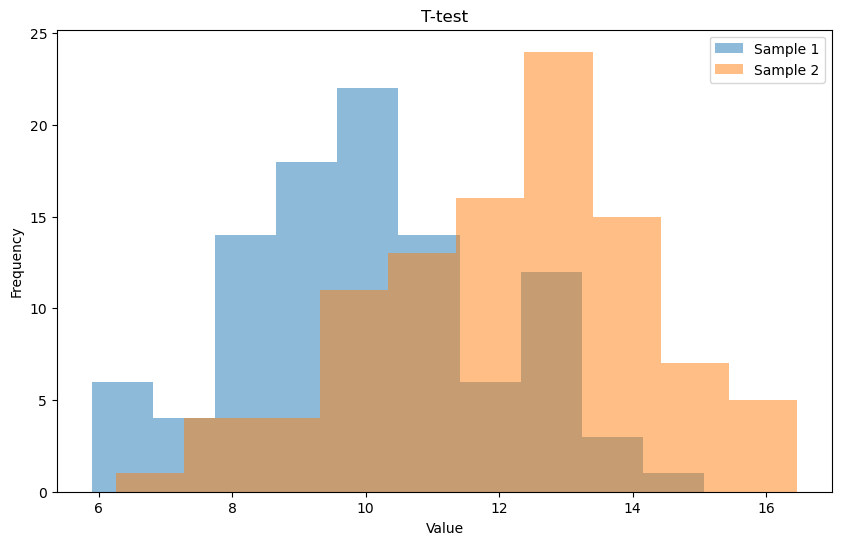

T-statistic: -7.316283828003789
P-value: 6.2111524377039085e-12
Reject null hypothesis


In [2]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# T-test
t_stat, p_value = ttest_ind(sample1, sample2)

# Hypothesis
alpha = 0.05
if p_value < alpha:
    hypothesis = "Reject null hypothesis"
else:
    hypothesis = "Fail to reject null hypothesis"

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(sample1, alpha=0.5, label='Sample 1')
plt.hist(sample2, alpha=0.5, label='Sample 2')
plt.title("T-test")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print("T-statistic:", t_stat)
print("P-value:", p_value)
print(hypothesis)


## Chi-square test Hypothesis

#### Null Hypothesis (H0): There is no significant association between the two categorical variables.
#### Alternative Hypothesis (H1): There is a significant association between the two categorical variables.
#### Decision Rule:

If the p-value is less than the chosen significance level (usually 0.05), reject the null hypothesis.

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Contingency table
observed = np.array([[10, 20], [30, 40]])

# Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

# Hypothesis
alpha = 0.05
if p_value < alpha:
    hypothesis = "Reject null hypothesis"
else:
    hypothesis = "Fail to reject null hypothesis"

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)
print(hypothesis)


Chi-square statistic: 0.4464285714285714
P-value: 0.5040358664525046
Fail to reject null hypothesis


## ANOVA Hypothesis
#### Null Hypothesis (H0): There is no significant difference between the means of the multiple groups.
#### Alternative Hypothesis (H1): At least one group mean is significantly different from the others.
#### Decision Rule:

If the p-value is less than the chosen significance level (usually 0.05), reject the null hypothesis.

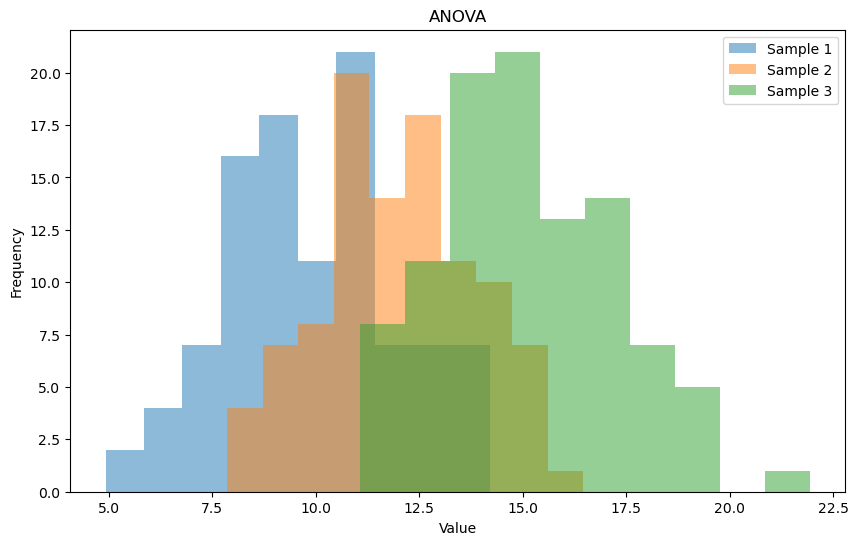

F-statistic: 169.83228243392267
P-value: 6.661881763452149e-50
Reject null hypothesis


In [4]:
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Sample data
sample1 = np.random.normal(loc=10, scale=2, size=100)
sample2 = np.random.normal(loc=12, scale=2, size=100)
sample3 = np.random.normal(loc=15, scale=2, size=100)

# ANOVA
f_stat, p_value = f_oneway(sample1, sample2, sample3)

# Hypothesis
alpha = 0.05
if p_value < alpha:
    hypothesis = "Reject null hypothesis"
else:
    hypothesis = "Fail to reject null hypothesis"

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(sample1, alpha=0.5, label='Sample 1')
plt.hist(sample2, alpha=0.5, label='Sample 2')
plt.hist(sample3, alpha=0.5, label='Sample 3')
plt.title("ANOVA")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print("F-statistic:", f_stat)
print("P-value:", p_value)
print(hypothesis)


`If you find value in my insights and learn something new, it brings me joy 😊.`